In [1]:
from datasets import load_dataset
import numpy as np

In [2]:
dataset = load_dataset("/pscratch/sd/h/helenqu/astropile_test/plasticc_h5")

/global/homes/h/helenqu/.local/perlmutter/python-3.11/lib/python3.11/site-packages/datasets/load.py:926: FutureWarning: The repository for plasticc_h5 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at /pscratch/sd/h/helenqu/astropile_test/plasticc_h5/plasticc_h5.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Resolving data files:   0%|          | 0/1350 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
example = dataset['train'][0]['lightcurve']

In [26]:
bands = np.unique(example['band'])
num_bands = len(bands)
seq_len = sum(np.array(example['band']) == bands[0])

shape = (num_bands, seq_len)

In [16]:
# find non-padding timestamps for a single band to determine the unpadded sequence length
true_seq_idxs = np.where(np.array(example['time']) != 0)[0]
single_band_mask = true_seq_idxs < seq_len
unpadded_seq_len = max(true_seq_idxs[single_band_mask])

In [24]:
# remove padding from data
times = np.reshape(example['time'], shape)[:, :unpadded_seq_len]
fluxes = np.reshape(example['flux'], shape)[:, :unpadded_seq_len]
flux_errs = np.reshape(example['flux_err'], shape)[:, :unpadded_seq_len]

Text(0.5, 0, 'time (MJD)')

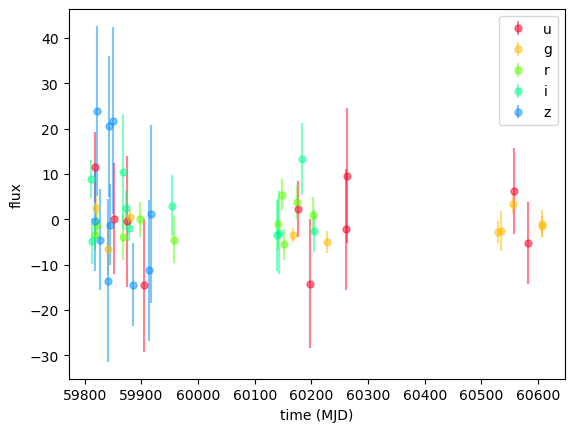

In [25]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('gist_rainbow')
colors = cmap(np.linspace(0,1,7))
bands = ['u', 'g', 'r', 'i', 'z', 'Y']

for i in range(num_bands):
    # don't plot missing bands
    if not times[i].any():
        continue

    plt.errorbar(times[i], fluxes[i], yerr=flux_errs[i], fmt='o', color=colors[i], markersize=5, alpha=0.5, label=bands[i])
plt.legend()
plt.ylabel("flux")
plt.xlabel("time (MJD)")